In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/train (2).csv')

In [3]:
df.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3950 entries, 0 to 3949
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   idx           3950 non-null   int64 
 1   class         3950 non-null   object
 2   conversation  3950 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.7+ KB


In [6]:
df.isna().sum()

,0
idx,0
class,0
conversation,0


In [7]:
df.duplicated(subset='conversation').sum()

np.int64(104)

In [11]:
display(df[df.duplicated(subset='conversation', keep=False)].head(10))

,idx,class,conversation
29,29,기타 괴롭힘 대화,병신이 아이스크림 먹게 돼 있냐?\n난 먹으면 안 돼? 그만 좀 해.\n당연히 안 ...
31,31,기타 괴롭힘 대화,니가 나 따라한다는 애구나?\n 내가? 나 너 안따라해.\n머라는거야. 여기 사진 ...
34,34,기타 괴롭힘 대화,야 손병신.\n하.\n한숨 쉬었어? 야 손병신.\n그렇게 부르지마.\n뭐? 병신한테...
94,94,기타 괴롭힘 대화,야 니 왤캐 못생겼냐?\n뭐라그랬냐?\n으 나 보고 말하지마 니 얼굴보면 토나올거 ...
114,114,기타 괴롭힘 대화,너 일로 따라와봐.\n왜 그러는데.?\n그냥 닥치고 따라오라면 따라와 진짜\n어어....
262,262,기타 괴롭힘 대화,저기요. 잠깐만요\n매일 왜이러세요. 전 할말 없어요\n그 쪽이 좋아서요\n전 관심...
267,267,직장 내 괴롭힘 대화,과장님. 저 이번에 휴가 좀 갔다와도 되겠습니까.?\n휴가? 왜??\n좀 쉬다가 오...
313,313,갈취 대화,어이 이리 와봐. \n네.? 저요?\n어 그래 너. 여기 너 밖에 더 있어?\n왜 ...
330,330,기타 괴롭힘 대화,야. 찐따야 오늘도 나왔네?\n나 좀 내버려둬. 제발\n찐따가 오늘 기분이 안 좋나...
340,340,기타 괴롭힘 대화,으 냄새나\n나?\n그럼 너지 누구냐\n갑자기 왜그러는데\n냄새나니까 그러지 좀 저...


In [12]:
df['char_len']=df['conversation'].str.len()
df['word_len']=df['conversation'].str.split().apply(len)
df['line_count']=df['conversation'].str.count('/n')+1

In [13]:
basic=df.groupby('class').agg(
    samples=('conversation','size'),
    avg_char_len=('char_len','mean'),
    avg_word_len=('word_len','mean'),
    avg_line_count=('line_count','mean'),
    min_word_len=('word_len','min'),
    max_word_len=('word_len','max')
).reset_index()

basic

,class,samples,avg_char_len,avg_word_len,avg_line_count,min_word_len,max_word_len
0,갈취 대화,981,216.185525,55.478084,1.0,10,185
1,기타 괴롭힘 대화,1094,210.078611,53.243144,1.0,12,222
2,직장 내 괴롭힘 대화,979,237.557712,58.504597,1.0,10,213
3,협박 대화,896,246.073661,62.002232,1.0,12,223


In [49]:
from matplotlib import font_manager, rcParams
rcParams["axes.unicode_minus"] = False

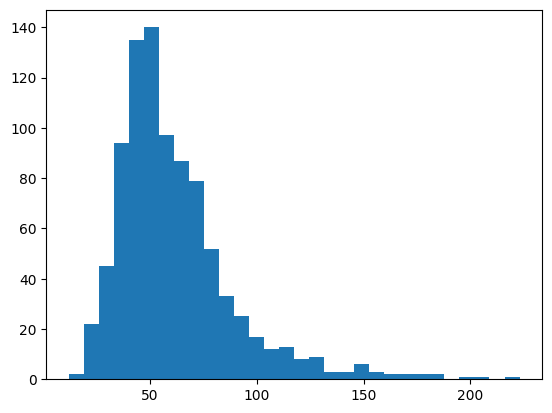

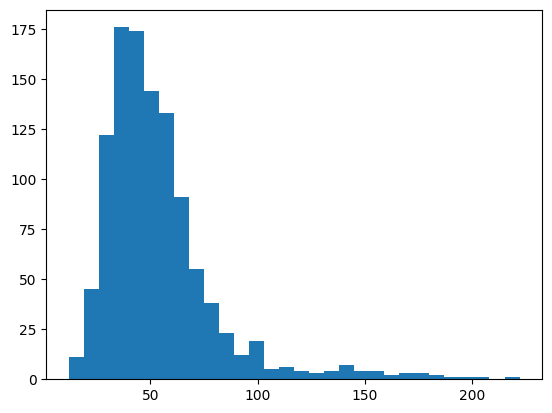

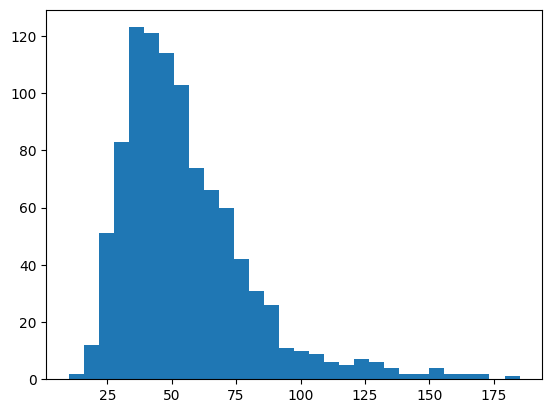

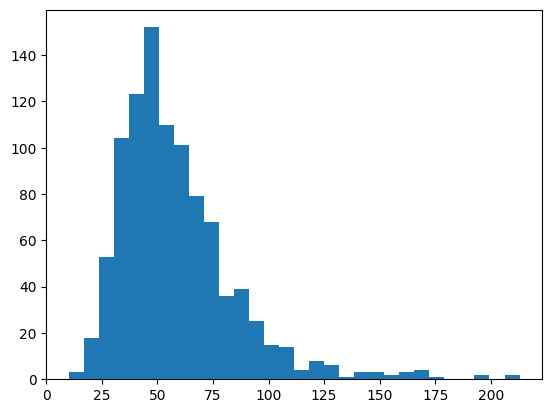

In [51]:
for cls in df['class'].unique():
  subset=df[df['class']==cls]
  plt.hist(subset['word_len'], bins=30, label=cls)
  plt.show()

In [28]:
import re
from collections import Counter
def tokenize(text):
  return re.findall(r'\b\w+\b', text)

stopwords = [
    "내가","나","너","네","니","니가","저","제가","그","이","왜",
    "아니","아니야","안","못","다","좀","아","야", '진짜', '이거', '지금','어','뭐','내','응', '그럼','그냥','너','여기','거', '것','더', '그래','너가','너도'
]
class_tokens={}
for cls, group in df.groupby('class'):
  counter=Counter()
  for text in group['conversation']:
    tokens=tokenize(text)
    tokens=[t for t in tokens if t not in stopwords]
    counter.update(tokens)
  class_tokens[cls]=counter.most_common(20)

for cls, tokens in class_tokens.items():
  print(f'Top words for class {cls}')
  print(tokens)

Top words for class 갈취 대화
[('돈', 774), ('돈이', 257), ('안돼', 245), ('없어', 242), ('내놔', 224), ('없어요', 208), ('제발', 198), ('빨리', 182), ('나도', 178), ('무슨', 171), ('그건', 153), ('어떻게', 146), ('잘', 139), ('한', 133), ('오늘', 130), ('정말', 129), ('우리', 128), ('수', 122), ('있어', 117), ('그거', 112)]
Top words for class 기타 괴롭힘 대화
[('죄송합니다', 229), ('그렇게', 225), ('무슨', 224), ('너무', 212), ('우리', 188), ('넌', 178), ('잘', 164), ('제발', 156), ('어떻게', 151), ('그만해', 148), ('뭘', 146), ('난', 142), ('말', 142), ('고객님', 130), ('해', 125), ('미안해', 118), ('근데', 117), ('이렇게', 116), ('손님', 114), ('그런', 114)]
Top words for class 직장 내 괴롭힘 대화
[('죄송합니다', 874), ('오늘', 246), ('부장님', 244), ('무슨', 220), ('아닙니다', 215), ('일', 214), ('그렇게', 201), ('너무', 193), ('잘', 176), ('알겠습니다', 174), ('회사', 165), ('이렇게', 149), ('그게', 148), ('우리', 139), ('그건', 138), ('하고', 134), ('할', 132), ('김대리', 132), ('과장님', 130), ('어떻게', 129)]
Top words for class 협박 대화
[('제발', 427), ('죄송합니다', 237), ('무슨', 201), ('우리', 200), ('어떻게', 198), ('수', 181), ('정말', 17

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer=TfidfVectorizer(token_pattern=r'\b\w+\b', min_df=3, stop_words=stopwords)
X=vectorizer.fit_transform(df['conversation'])
feature_names=vectorizer.get_feature_names_out()

top_tfidf={}
for cls in df['class'].unique():
  idxs=df.index[df['class']==cls]
  mean_tfidf = X[idxs].mean(axis=0).A1
  top_idx = np.argsort(mean_tfidf)[-15:][::-1]
  top_tfidf[cls] = list(zip(feature_names[top_idx], mean_tfidf[top_idx]))

for cls, items in top_tfidf.items():
    print(f"\nTop TF‑IDF for class{cls}:")
    print(items)



Top TF‑IDF for class협박 대화:
[('제발', np.float64(0.03656287778373365)), ('죄송합니다', np.float64(0.020497920330845937)), ('살려주세요', np.float64(0.01943646962103431)), ('어떻게', np.float64(0.017058876745828264)), ('난', np.float64(0.01652321463497667)), ('우리', np.float64(0.016329245232361456)), ('넌', np.float64(0.016299567583461714)), ('정말', np.float64(0.016275993979050666)), ('수', np.float64(0.01626458372866889)), ('당장', np.float64(0.01568918831654203)), ('무슨', np.float64(0.015462592501836101)), ('있어', np.float64(0.014695326820655235)), ('해', np.float64(0.014179601359529762)), ('그렇게', np.float64(0.013162337187817695)), ('한', np.float64(0.012686028127821016))]

Top TF‑IDF for class기타 괴롭힘 대화:
[('그만해', np.float64(0.018381315706409)), ('너무', np.float64(0.016906376662313226)), ('고객님', np.float64(0.016644693145037748)), ('그렇게', np.float64(0.016510998564469664)), ('무슨', np.float64(0.016201682395823026)), ('죄송합니다', np.float64(0.016035193282324042)), ('넌', np.float64(0.015320806491528255)), ('손님', np.floa

In [31]:
vectorizer2=CountVectorizer(token_pattern=r'\b\w+\b', ngram_range=(2, 2), min_df=3, stop_words=stopwords)
X_bigrams=vectorizer2.fit_transform(df['conversation'])
features_names_bi=np.array(vectorizer2.get_feature_names_out())

top_bigrams={}
for cls in df['class'].unique():
  idxs=df.index[df['class']==cls]
  sums=X_bigrams[idxs].sum(axis=0).A1
  top_index=np.argsort(sums)[-15:][::-1]
  top_bigrams[cls]=[(features_names_bi[i],int(sums[i])) for i in top_index]

for cls, bigrams in top_bigrams.items():
    print(f"\nTop bigrams for class {cls}:")
    print(bigrams)


Top bigrams for class 협박 대화:
[('줄 알아', 35), ('할 수', 29), ('한 번만', 29), ('제발 살려주세요', 26), ('한 번', 24), ('그게 무슨', 24), ('시키는 대로', 21), ('시간을 주세요', 21), ('수 있어', 21), ('수가 있어', 20), ('정말 죄송합니다', 19), ('좋은 말로', 18), ('제발 살려줘', 18), ('어쩔 수', 18), ('무슨 소리야', 16)]

Top bigrams for class 기타 괴롭힘 대화:
[('할 수', 30), ('말이 너무', 26), ('죄송합니다 고객님', 24), ('무슨 소리야', 21), ('제발 그만해', 19), ('그게 무슨', 19), ('말을 그렇게', 18), ('죄송합니다 손님', 15), ('무슨 말을', 15), ('그게 아니라', 14), ('수 있어', 14), ('하지 마', 13), ('말이 많아', 13), ('그만 해', 13), ('이게 뭐야', 13)]

Top bigrams for class 갈취 대화:
[('돈 없어', 58), ('돈 없어요', 51), ('뒤져서 나오면', 47), ('돈이 없어', 40), ('돈이 없어서', 37), ('돈 내놔', 35), ('할 때', 33), ('맞고 줄래', 28), ('어이 거기', 27), ('한 번', 25), ('돈이 없어요', 24), ('한 번만', 23), ('줄래 줄래', 21), ('돈 있냐', 20), ('있는 돈', 18)]

Top bigrams for class 직장 내 괴롭힘 대화:
[('정말 죄송합니다', 40), ('아닌 같습니다', 32), ('그게 아니라', 29), ('아닙니다 죄송합니다', 26), ('열심히 하겠습니다', 24), ('이건 아닌', 23), ('죄송합니다 다시', 23), ('죄송합니다 죄송하면', 23), ('죄송합니다 부장님', 22), ('한 번', 21), ('할 수', 21),

In [33]:
vectorizer3=CountVectorizer(token_pattern=r'\b\w+\b', ngram_range=(3, 3), min_df=3, stop_words=stopwords)
X_trigrams=vectorizer3.fit_transform(df['conversation'])
features_names_tri=np.array(vectorizer3.get_feature_names_out())

top_trigrams={}
for cls  in df['class'].unique():
  idxs=df.index[df['class']==cls]
  sums=X_trigrams[idxs].sum(axis=0).A1
  top_idxs=np.argsort(sums)[-15:][::-1]
  top_trigrams[cls]=[(features_names_tri[i], int(sums[i])) for i in top_idxs]

for cls, trigrams in top_trigrams.items():
    print(f"\nTop trigrams for class {cls}:")
    print(trigrams)


Top trigrams for class 협박 대화:
[('말로 할 때', 10), ('좋은 말로 할', 10), ('조금만 시간을 주세요', 9), ('어쩔 수 없지', 8), ('한 번만 봐주세요', 8), ('무슨 말을 그렇게', 7), ('쥐도 새도 모르게', 6), ('줄 알아 제발', 6), ('시간을 조금만 주세요', 6), ('제발 한 번만', 5), ('죽고 싶지 않으면', 5), ('죽을 줄 알아', 5), ('죽일 수 밖에', 5), ('죽여버리는 수가 있어', 5), ('좋은 말로 할때', 5)]

Top trigrams for class 기타 괴롭힘 대화:
[('말이 너무 심하잖아', 10), ('말을 그렇게 해', 10), ('무슨 말을 그렇게', 8), ('할 수 있어', 7), ('그런 적 없어', 5), ('그걸 어떻게 알아', 4), ('그만해 뭘 그만해', 4), ('죄송합니다 고객님 혹시', 4), ('말이 너무 심한', 4), ('혹시 주문번호가 어떻게', 4), ('말이 너무 심하다', 4), ('손님이 왕인거 몰라', 4), ('무슨 말을 그렇게해', 4), ('말이 너무 심한거', 4), ('그게 무슨 소리야', 4)]

Top trigrams for class 갈취 대화:
[('맞고 줄래 줄래', 18), ('말로 할 때', 15), ('좋은 말로 할', 13), ('없어요 뒤져서 나오면', 12), ('좋은 말 할때', 9), ('용돈 받기 전까지', 9), ('좋은말로 할 때', 7), ('우리 엄마가 사준거야', 7), ('어떻게 벼텨 용돈', 7), ('빌려줄 수 있어', 7), ('말 할 때', 6), ('나는 어떻게 벼텨', 6), ('좋게 말할 때', 6), ('돈 없어요 뒤져서', 6), ('빌려줄 수 있을까', 6)]

Top trigrams for class 직장 내 괴롭힘 대화:
[('이건 아닌 같습니다', 16), ('죄송합니다 죄송하면 다야', 13), ('그래도 이건 아닌', 10), ('

# 갈취 대화

핵심 단어: 돈, 내놔, 없어, 빨리, 줄래

바이그램/트라이그램: 돈 없어, 돈 내놔, 맞고 줄래 줄래

인사이트: 돈 요구, 협박, 명령문이 중심.
돈과 관련된 표현 + 협박성 어휘는 분류의 강력한 신호.

# 기타 괴롭힘 대화

핵심 단어: 그만해, 고객님, 손님, 너무, 미안해

바이그램/트라이그램: 죄송합니다 고객님, 제발 그만해, 말이 너무 심하다

인사이트: 일상 갈등, 서비스 상황, 사과와 중지 요청이 중심.
감정 표현과 상대방 호칭이 중요한 특징.

# 직장 내 괴롭힘 대화

핵심 단어: 죄송합니다, 부장님, 과장님, 김대리, 회사, 알겠습니다

바이그램/트라이그램: 정말 죄송합니다, 죄송합니다 부장님, 이건 아닌 같습니다

인사이트: 회사 맥락, 직급 호칭, 공식적인 사과 표현.
직장 관련 호칭과 반복되는 사과 패턴이 강력한 특징.

# 협박 대화

핵심 단어: 제발, 살려주세요, 당장, 죽을 줄 알아

바이그램/트라이그램: 제발 살려주세요, 죽고 싶지 않으면, 쥐도 새도 모르게

인사이트: 목숨 위협, 살려달라는 간청, 극단적 표현.
 위협/간청 구조가 거의 유일하게 이 클래스에서 등장.

TF-IDF 기반 로지스틱 회귀 / SVM → 빠르고 정확

심층 모델(LSTM, Transformer)도 가능하지만 n-그램 특징만으로도 효과적